# Función, dominio, rango y resolución de la integral

Este notebook muestra:


- El dominio y el rango de la función


\[ f(x) = \frac{3x - 4}{(x - 5)(x + 1)} \]


- Una gráfica con las asíntotas y **anotaciones** que indican el **dominio** y el **rango**.


- Un desarrollo **paso a paso** (algoritmo documentado) para resolver la integral indefinida \(\int f(x)\,dx\) usando descomposición en fracciones simples, y verificación simbólica y numérica.

In [1]:
# Imports y configuración
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Markdown

# Para que las gráficas se vean mejor en notebooks
plt.rcParams['figure.figsize'] = (10,6)

## Definición simbólica y numérica de la función

In [17]:
# Símbolos
x, y = sp.symbols('x y')


# Función simbólica
f_sym = (3*x - 4)/((x - 5)*(x + 1))


# Función numérica (lambda) para graficar
f_num = sp.lambdify(x, f_sym, 'numpy')


# display(Markdown(f'**Función simbólica:** f(x) = \frac{3x - 4}{(x - 5)(x + 1)} $'))


# Mostrar expresión simplificada
display(Markdown(f"**Expresión (Sympy):** `{sp.simplify(f_sym)}`"))

**Expresión (Sympy):** `(3*x - 4)/((x - 5)*(x + 1))`

## Dominio

In [9]:
# El denominador se anula en x = 5 y x = -1
puntos_prohibidos = [5, -1]


display(Markdown(f"**Dominio:** $\mathbb{{R}} \setminus {{-1,\;5}}$\n\n(Puntos prohibidos: `{puntos_prohibidos}`)"))

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\;'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_6882/348964594.py:5: SyntaxWarning: invalid escape sequence '\m'
  display(Markdown(f"**Dominio:** $\mathbb{{R}} \setminus {{-1,\;5}}$\n\n(Puntos prohibidos: `{puntos_prohibidos}`)"))
/tmp/ipykernel_6882/348964594.py:5: SyntaxWarning: invalid escape sequence '\s'
  display(Markdown(f"**Dominio:** $\mathbb{{R}} \setminus {{-1,\;5}}$\n\n(Puntos prohibidos: `{puntos_prohibidos}`)"))
/tmp/ipykernel_6882/348964594.py:5: SyntaxWarning: invalid escape sequence '\;'
  display(Markdown(f"**Dominio:** $\mathbb{{R}} \setminus {{-1,\;5}}$\n\n(Puntos prohibidos: `{puntos_prohibidos}`)"))


**Dominio:** $\mathbb{R} \setminus {-1,\;5}$

(Puntos prohibidos: `[5, -1]`)

## Rango (demostración)

In [11]:
# Para encontrar el rango, despejamos y y analizamos la condición de existencia de x real.
# y = (3x - 4)/((x - 5)(x + 1)) -> y(x^2 - 4x - 5) = 3x - 4
# -> y x^2 - (4y + 3) x + (-5y + 4) = 0


# Coeficientes de la cuadrática en x
A_quad = y
B_quad = -(4*y + 3)
C_quad = -5*y + 4


# Discriminante respecto a x
Delta = sp.simplify(B_quad**2 - 4*A_quad*C_quad)
Delta


# Mostrar discriminante y analizar
display(Markdown(f"**Discriminante (en y):** $\Delta(y) = {sp.pretty(Delta)}$"))


# Comprobación: el polinomio Delta = 36 y^2 + 8 y + 9
Delta_simpl = sp.expand(Delta)
display(Markdown(f"Simplificando: $\Delta(y) = {sp.pretty(Delta_simpl)}$"))


# Analicemos si existe algún y para el cual Delta < 0.
# Como es un polinomio cuadrático en y con coeficiente principal positivo, basta estudiar su discriminante.
Disc_Delta = sp.discriminant(Delta_simpl, y)
display(Markdown(f"Discriminante de Delta (número): {Disc_Delta} -> si < 0 entonces Delta(y) > 0 para todo y"))


# Mostrar conclusión
if Disc_Delta < 0:
    display(Markdown("Como el discriminante de `Delta(y)` es negativo y el coeficiente principal de `Delta(y)` es positivo, `Delta(y) > 0` para todo `y`. Por tanto existe al menos una x real para cada y real.\n\n**Rango:** $\mathbb{R}$"))
else:
    display(Markdown("Resultado inesperado: investigar manualmente."))

<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6882/2157266897.py:18: SyntaxWarning: invalid escape sequence '\D'
  display(Markdown(f"**Discriminante (en y):** $\Delta(y) = {sp.pretty(Delta)}$"))
/tmp/ipykernel_6882/2157266897.py:23: SyntaxWarning: invalid escape sequence '\D'
  display(Markdown(f"Simplificando: $\Delta(y) = {sp.pretty(Delta_simpl)}$"))
/tmp/ipykernel_6882/2157266897.py:34: SyntaxWarning: invalid escape sequence '\m'
  display(Markdown("Como el discriminante de `Delta(y)` es negativo y el coeficiente principal de `Delta(y)` es positivo, `Delta(y) > 0` para todo `y`. Por tanto existe al menos una x real para cada y real.\n\n**Rango:** $\mathbb{R}$"))


**Discriminante (en y):** $\Delta(y) =     2          
36⋅y  + 8⋅y + 9$

Simplificando: $\Delta(y) =     2          
36⋅y  + 8⋅y + 9$

Discriminante de Delta (número): -1232 -> si < 0 entonces Delta(y) > 0 para todo y

Como el discriminante de `Delta(y)` es negativo y el coeficiente principal de `Delta(y)` es positivo, `Delta(y) > 0` para todo `y`. Por tanto existe al menos una x real para cada y real.

**Rango:** $\mathbb{R}$

## Gráfica con dominio y rango anotados

<>:27: SyntaxWarning: invalid escape sequence '\ '
<>:27: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_6882/110808704.py:27: SyntaxWarning: invalid escape sequence '\ '
  plt.text(0.02, 0.95, 'Dominio: R \ {-1, 5}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


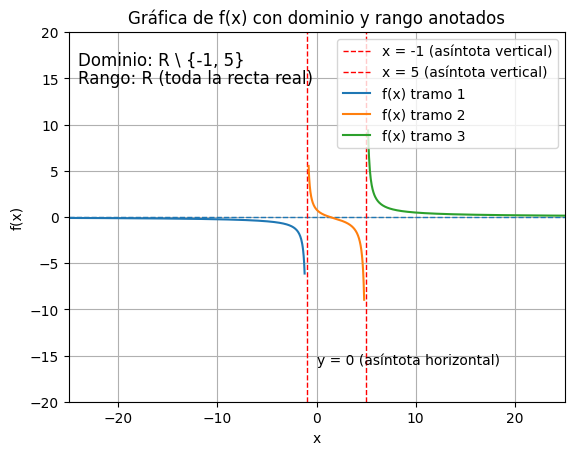

In [12]:
# Construimos tres intervalos para evitar los puntos singulares en la gráfica
x1 = np.linspace(-50, -1.2, 1000)
x2 = np.linspace(-0.8, 4.8, 1000)
x3 = np.linspace(5.2, 50, 1000)


plt.figure()
plt.axhline(0, linestyle='--', linewidth=1)


# Asíntotas verticales
plt.axvline(-1, color='red', linestyle='--', linewidth=1, label='x = -1 (asíntota vertical)')
plt.axvline(5, color='red', linestyle='--', linewidth=1, label='x = 5 (asíntota vertical)')


# Asíntota horizontal y=0
plt.annotate('y = 0 (asíntota horizontal)', xy=(0.5, 0.1), xycoords='axes fraction')


# Graficar cada tramo por separado
plt.plot(x1, f_num(x1), label='f(x) tramo 1')
plt.plot(x2, f_num(x2), label='f(x) tramo 2')
plt.plot(x3, f_num(x3), label='f(x) tramo 3')


# Añadir anotaciones de dominio y rango en la gráfica
plt.text(0.02, 0.95, 'Dominio: R \ {-1, 5}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.02, 0.90, 'Rango: R (toda la recta real)', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


# Límites para una visualización clara
plt.ylim(-20, 20)
plt.xlim(-25, 25)


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) con dominio y rango anotados')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Desarrollo paso a paso del algoritmo para integrar \(f(x)\)

## **Algoritmo (visión general):**
1. Comprobar los grados del numerador y denominador. Si el numerador tiene grado >= denominador, hacer división polinómica.

2. Como aquí grado(numerador)=1 < grado(denominador)=2, vamos a usar descomposición en **fracciones simples**.

3. Plantear la forma: \(\frac{3x-4}{(x-5)(x+1)} = \frac{A}{x-5} + \frac{B}{x+1}\).

4. Igualar numeradores y resolver el sistema lineal para A y B.

5. Integrar término a término: \(\int \frac{A}{x-5}dx = A \ln|x-5| + C\), etc.

# **Paso 1: descomposición en fracciones simples (simbólica)**

In [13]:
apart_expr = sp.apart(f_sym, x)
display(Markdown(f"Descomposición con `sympy.apart`: `{apart_expr}`"))

Descomposición con `sympy.apart`: `7/(6*(x + 1)) + 11/(6*(x - 5))`

In [19]:
import sympy as sp

In [37]:
# Definimos la variable simbólica
x_symbol = sp.Symbol('x')

# Definimos la función
function_f = (3*x_symbol - 4) / ((x_symbol - 5) * (x_symbol + 1))

In [57]:
# =====================
# Dominio
# =====================
dominio = sp.calculus.util.continuous_domain(function_f, x_symbol, sp.S.Reals)
print("Dominio:", dominio)

# =====================
# Rango
# =====================
y_symbol = sp.Symbol('y')
# Resolver f(x) = y
eq = sp.Eq(function_f, y_symbol)
sol = sp.solve(eq, x_symbol)

# Calcular límite cuando x tiende a infinito
lim_infinit_positive = sp.limit(function_f, x_symbol, sp.oo)

# Calcular límite cuando x tiende a menos infinito
lim_infinit_negative = sp.limit(function_f, x_symbol, -sp.oo)


print(f"Asintota horizontal cuando x→∞: y = {lim_infinit_positive}")
print(f"Asintota horizontal cuando x→-∞: y = {lim_infinit_negative}")

# Excluir la asíntota horizontal
rango = sp.Complement(sp.S.Reals, {0})
print("Rango:", rango)

Dominio: Union(Interval.open(-oo, -1), Interval.open(-1, 5), Interval.open(5, oo))
Asintota horizontal cuando x→∞: y = 0
Asintota horizontal cuando x→-∞: y = 0
Rango: Union(Interval.open(-oo, 0), Interval.open(0, oo))


In [47]:
# =====================
# Derivada e integral
# =====================
derivada = sp.diff(function_f, x_symbol)
integral = sp.integrate(function_f, x_symbol)
print("Derivada:", derivada)
print("Integral:", integral)

# =====================
# Raíces
# =====================
raices = sp.solve(sp.Eq(function_f, 0), x_symbol)
print("Raíces:", raices)

Derivada: 3/((x - 5)*(x + 1)) - (3*x - 4)/((x - 5)*(x + 1)**2) - (3*x - 4)/((x - 5)**2*(x + 1))
Integral: 11*log(x - 5)/6 + 7*log(x + 1)/6
Raíces: [4/3]


In [30]:
# =====================
# Gráfica con asíntotas
# =====================
import matplotlib.pyplot as plt
import numpy as np

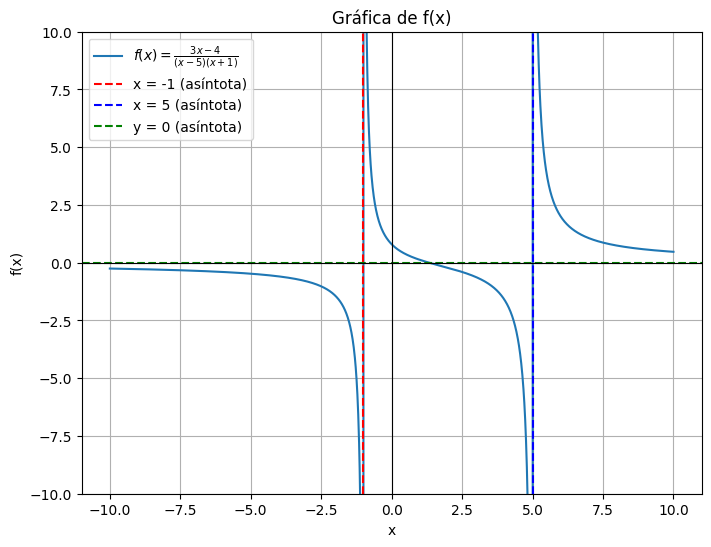

In [52]:
# Definir función numérica
f_lambd = sp.lambdify(x_symbol, function_f, 'numpy')

X = np.linspace(-10, 10, 2000)
X = X[(np.abs(X-1) > 0.05) & (np.abs(X+5) > 0.05)]  # evitar divisiones por cero
Y = f_lambd(X)


plt.figure(figsize=(8,6))
plt.plot(X, Y, label=r"$f(x)=\frac{3x-4}{(x-5)(x+1)}$")


# Asíntotas verticales
plt.axvline(-1, color='red', linestyle="--", label="x = -1 (asíntota)")
plt.axvline(5, color='blue', linestyle="--", label="x = 5 (asíntota)")

# Asíntota horizontal
plt.axhline(0, color='green', linestyle="--", label="y = 0 (asíntota)")

# Ejes
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)


plt.ylim(-10, 10)
plt.legend()
plt.title("Gráfica de f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()
